# Getting Started

Note: Only one notebook can be connected to the robot at a time. To disconnect the notebook from the robot, click the restart kernel button button at the top of the window next to the "Stop" button (Interrupt the kernel).

In [1]:
#Imports 
import rmlib
import numpy as np

#Init robot
rm = rmlib.RMLib()

Setting up robot please wait...
Robot Ready!


# Gripper Basics

##### <b> Open and Close

<code>open_gripper()</code> opens the gripper and returns whether the gripper was fully opened

In [11]:
rm.open_gripper()

False

<code> close_gripper()</code> closes the gripper and returns whether was full closed

In [9]:
rm.close_gripper()

False

<code>set_gripper_width(width)</code> sets the gripper aperture to <code>width</code> provided in meters (Range from 0 to 0.108)<br> 
<code>get_gripper_width()</code> returns the gripper width in meters

In [4]:
rm.set_gripper_width(0.04)
rm.get_gripper_width()

0.041

<code>zero_gripper()</code> re-zeros gripper. Run when changing gripper finger pads or when <code>get_gripper_width()</code> is returning incorrect values<br> 

In [5]:
rm.zero_gripper()

1

<code>set_gripper_width_left(width)</code> and <code>set_gripper_width_right(width)</code> control each fingers' distance from center (Range from 0 to 0.054)

In [6]:
rm.set_gripper_width_left(0.03)
rm.set_gripper_width_right(0.00)

True

##### <b> Torque Setting</b>
Setting gripper toque low can be useful in situations dealing with delicate objects or when you anticipate possible collisions. If the torque is set too low, it might not be sufficient to move the gripper. Values are dimension-less and range from <code>0</code> to <code>1</code> (maximum torque). 

In [7]:
rm.set_gripper_torque(0.3)  

True

In [10]:
rm.set_gripper_torque(1) # Maximum torque

True

<code>deactivate_gripper()</code> turns off the gripper motors.

In [12]:
rm.deactivate_gripper()

1

# Arm Basics

#### <b> TCP Pose
The TCP pose is stored as a 4x4 homogeneous transformation matrix. 

In [13]:
tcp = rm.get_tcp_pose()
print(tcp)

[[-9.99998797e-01  1.55073566e-03 -2.94319057e-05 -7.10944616e-02]
 [ 1.55068492e-03  9.99997433e-01  1.65220734e-03 -3.27275782e-01]
 [ 3.19939670e-05  1.65215971e-03 -9.99998635e-01  1.10131386e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


<code>movej(pose)</code> moves the tcp in linear joint space to <code>pose</code>

In [14]:
tcp_up = rm.translate_pose(tcp.copy(),y=+0.10,z=0.0,frame='base')
print(tcp_up)
rm.movej(tcp_up)

[[-9.99998797e-01  1.55073566e-03 -2.94319057e-05 -7.10944616e-02]
 [ 1.55068492e-03  9.99997433e-01  1.65220734e-03 -2.27275782e-01]
 [ 3.19939670e-05  1.65215971e-03 -9.99998635e-01  1.10131386e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


True

<code>movel(pose)</code> moves the tcp in linear cartesian space to <code>pose</code>

In [15]:
rm.movel(tcp)

True

#### <b> Joint Angles
Joint angles are stored as a list where the elements correspond to the angle of the joint in radians. A 6-DoF platform returns a list with 6 elements. The first element is the joint angle at the base, the last element the angle of the wrist.

In [16]:
ja = rm.get_joint_angles()
print(ja)

[4.831964015960693, -1.1593659559832972, -1.9924686590777796, -1.562188450490133, 1.5653607845306396, 0.11902695149183273]


In [17]:
ja[5] = 0  # Set wrist angle

rm.set_joint_angles(ja)

True

#### <b> Alignment</b>
<code>align_gripper_with_axis()</code> aligns the gripper with the closest X, Y, and Z axes. 

In [18]:
rm.align_gripper_with_axis()

True

<b>Force-Torque Measurements</b>

<code>get_tcp_force()</code> returns force-torque measurements from the robot. The function returns six values, the forces in x, y, and z direction as well as the torques around these axes.

In [19]:
rm.get_tcp_force()

[9.606692104612032,
 -11.424511144011616,
 1.1684858609933515,
 4.353293118175775,
 5.184463011405037,
 1.2193500185072204]

# Point Cloud Basics

The RealSense sensor returns a color and a depth image. Depth images can be converted into point clouds. Point clouds are the main way the depth information is processed. A point cloud is returned as an <code>nx3</code> array with the columns corresponding to the x, y, and z coordinates for each point. 

## Set disparity shift

The fidelity of the depth sensor depends on the distance to the objects. The RealSense sensor allows to accomodate for this by tuning the "disparity shift" value.<br> 

The disparity shift is dependent on the height of the point cloud. If the disparity is not set correctly your cloud will be distorted.<br>

The function <code>set_disparity_shit_dist</code> should be used to set the disparity shift based on the minimum distance to and object.

In [24]:
rm.set_disparity_shift_dist(0.10)

116

## Get a point cloud

In [25]:
# Open Gripper to ensure full view is captured
rm.open_gripper()
cloud = rm.get_cloud()

print("This point cloud has", np.shape(cloud)[0], "points")

This point cloud has 688333 points


It is quite computationally intensive to try to view and manipulate hundreds of thousands of points. After taking a cloud, we compress the cloud with voxel grids to make the data more manageable. <code>downsample_cloud(cloud,size)</code> takes a point cloud <code>cloud</code> and groups all points within a cube with edge length size <code>size</code> into a single point, resulting into a point cloud with a reduced number of points.

In [26]:
# Compress the cloud with a voxel size of 2mm
cloud_vg = rm.downsample_cloud(cloud,0.002)

print("This point cloud has been down sampled to", np.shape(cloud_vg)[0], "points")

This point cloud has been down sampled to 14917 points


Point clouds can be visualized with the <code>PC_Viewer()</code> class. After initializing a viewer object <code>view</code>, <code>add_cloud(cloud)</code> adds a point cloud to the viewer object and <code>show()</code> renders the point cloud. Use the mouse to rotate and zoom in the rendering.

In [27]:
# Initialize the viewer
view = rm.PC_Viewer()
view.add_cloud(cloud_vg)
view.show()

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.008602729496548495, 0.2759214931300957, 1…

# Color Image Basics

A color image is returned as a 1280 x 720 array of color (RGB) data. The process for viewing color image data is similar to the point cloud viewer, which takes the color data and displays an image.

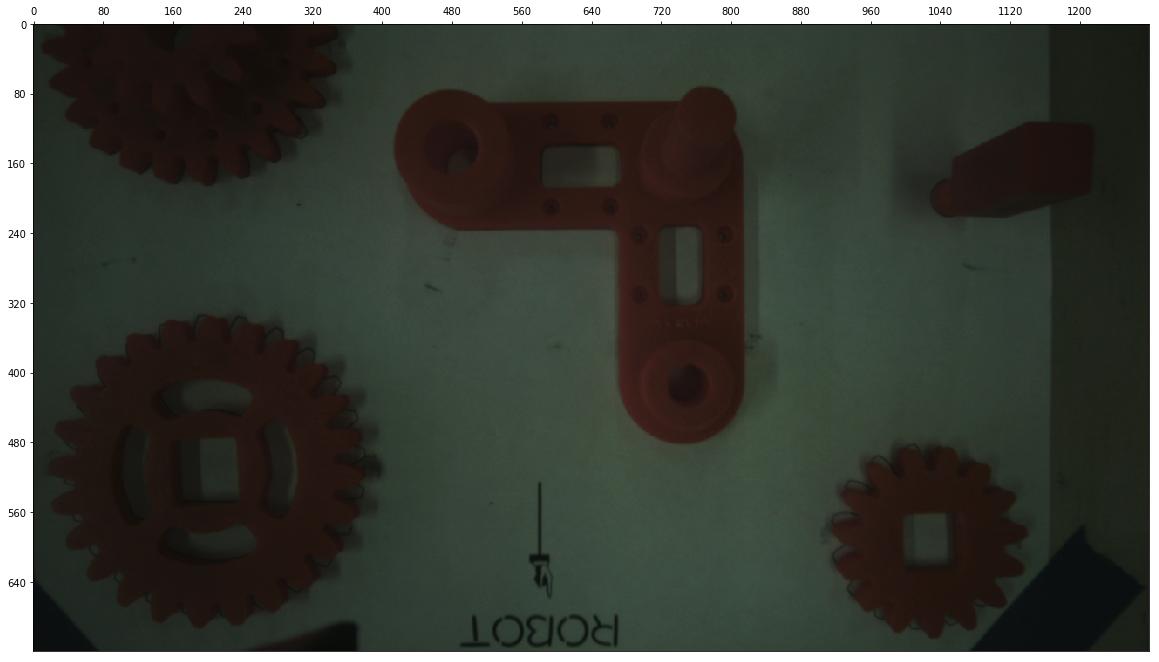

In [28]:
ci = rm.get_color_image()

view = rm.CI_Viewer()
view.add_image(ci)
view.show()

# Depth Image Basics
<br> The third datatype that we can get from the camera is a depth image. The depth image holds the same information as the point cloud, but the valuse are mapped to the 
    1280 x 720 image rather than coordinates in cartesian space. The depth image can be viewed similar to the color image.

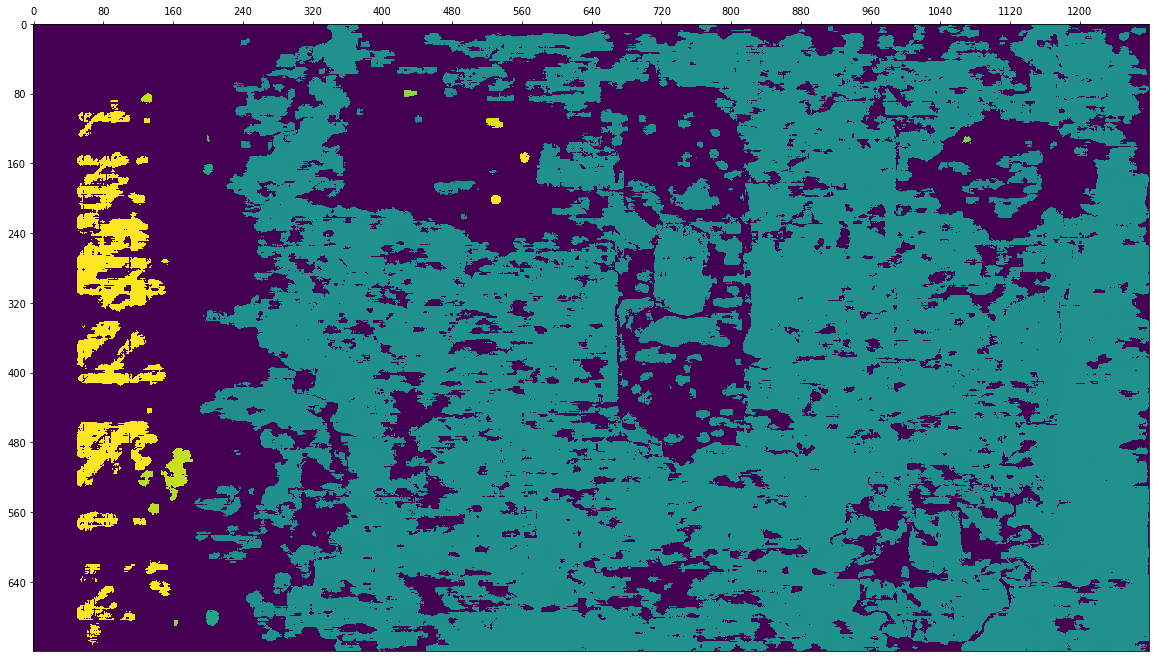

In [29]:
depth = rm.get_depth_image()

view = rm.DI_Viewer()
view.add_image(depth)
view.show()